# Anomaly Detection in Google Trends data

A statistical analysis of data, time dependent, using 'Anomaly Detection' in R.

In [8]:
#   __      _____             _              __        _       
# <(o )___ |  _  |___ ___ ___| |_ ___ ___   |  |   ___| |_ ___ 
# ( ._> /  |   __|  _| -_|_ -|  _| -_|_ -|  |  |__| .'| . |_ -|
#  `---'   |__|  |_| |___|___|_| |___|___|  |_____|__,|___|___|
#==============================================================================
# Anomaly Detection in R
#==============================================================================
# Title          : ilegra.r
# Description    : Analyzing Google Trends Data in R.
# Author         : Isaias V. Prestes <isaias.prestes@gmail.com>
# Date           : 20180419
# Version        : 0.0.1
# Usage          : Run in R 3.4
# Notes          : based on 
#                  Jake Hoare (DisplayR)
# https://datascienceplus.com/analyzing-google-trends-data-in-r/
#                  gtrendsR documentation
# https://github.com/PMassicotte/gtrendsR
#                  Peer Christensen https://rpubs.com/PChristensen/307008
#                  Tibble package
# https://www.rdocumentation.org/packages/tibbletime/versions/0.0.2/topics/tbl_time
# https://github.com/business-science/anomalize/blob/master/vignettes/anomalize_quick_start_guide.Rmd
# R version      : 3.4
#==============================================================================

#==============================================================================
# PACKAGE INSTALATION
#==============================================================================
if(!require("anomalize")) install.packages("anomalize")
if(!require("tidyverse")) install.packages("tidyverse")
if(!require("tibbletime")) install.packages("tibbletime")
if(!require("gtrendsR")) install.packages("gtrendsR") # google data
if(!require("ggplot2")) install.packages("ggplot2") # google data
if(!require("dplyr")) install.packages("dplyr") # google data
#==============================================================================
# LIBRARY DEPENDENCE
#==============================================================================
library(anomalize) #tidy anomaly detectiom
library(tidyverse) #tidyverse packages like dplyr, ggplot, tidyr
library(tibbletime) #tidyverse packages like dplyr, ggplot, tidyr
library(gtrendsR)
library(dplyr)
library(ggplot2)



count_data,date
26,2010-12-31
67,2011-01-31
46,2011-02-28
48,2011-03-31
91,2011-04-30
68,2011-05-31


Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 12 months
trend = 44 months


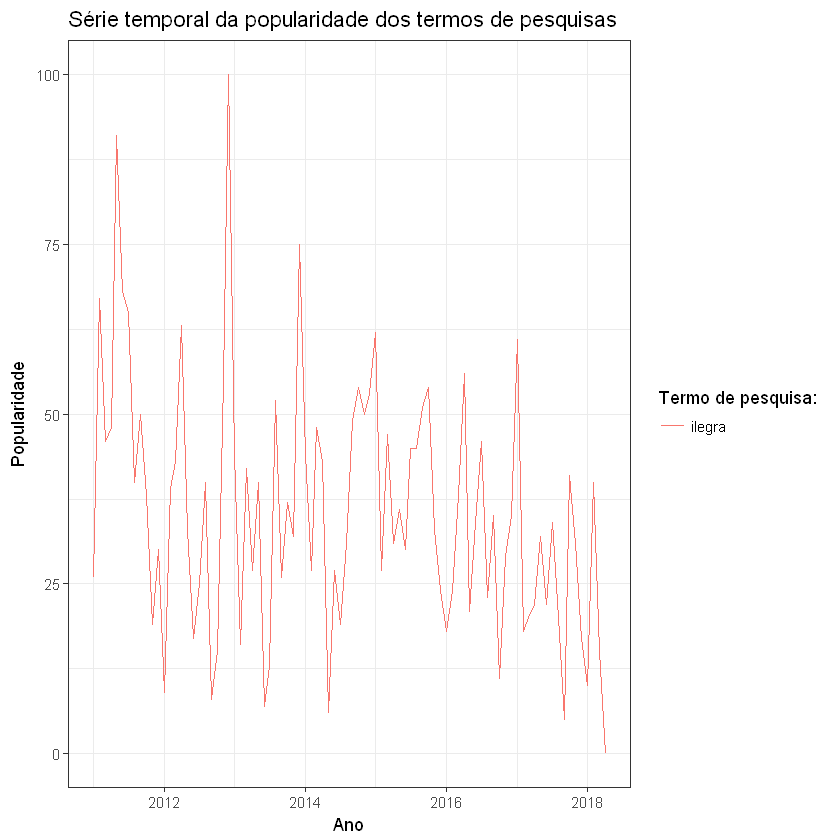

Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 12 months
trend = 44 months


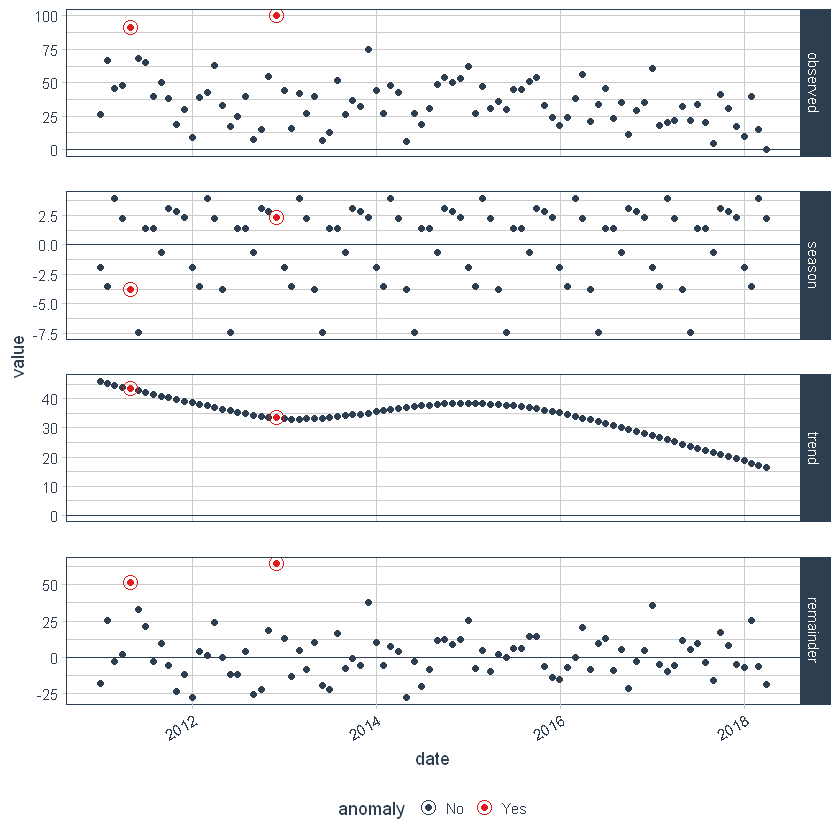

Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 12 months
trend = 44 months


date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2


ERROR: Error in plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5): argumento "data" ausente, sem padrão


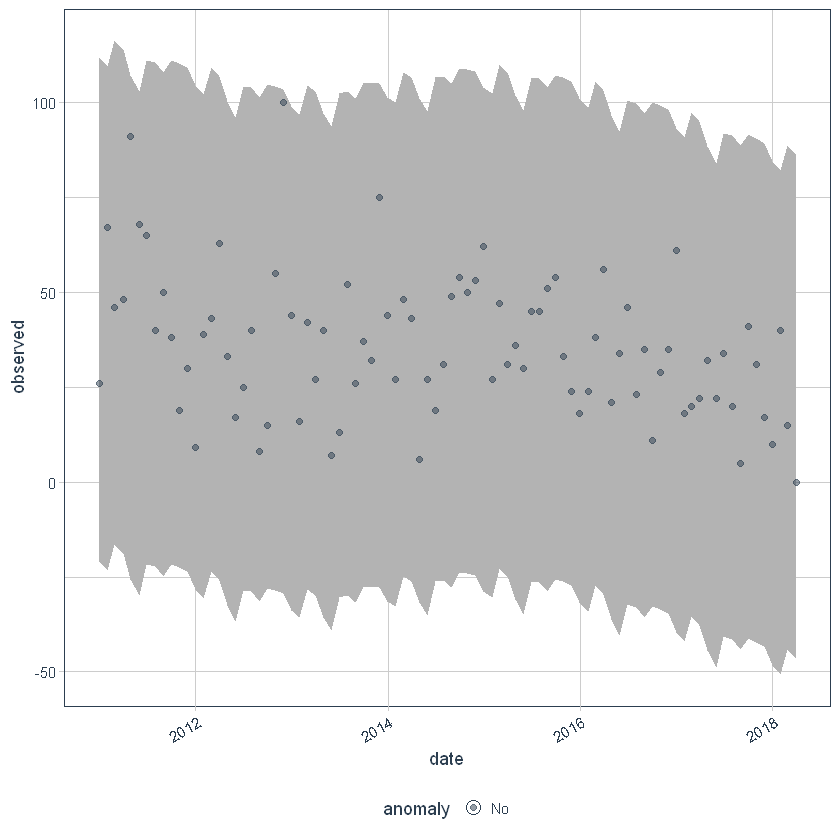

In [10]:
#==============================================================================
# Fire in the hole!
#==============================================================================

# Search Parameters -----------------------------------------------------------
search_terms <- c("ilegra")
# Countries codes https://en.wikipedia.org/wiki/ISO_3166-2
# detaild version http://www.unece.org/cefact/codesfortrade/codes_index.html
search_country <- c("BR") # default is worldwide
# Time interval - Time span between two dates (ex.: "2010-01-01 2010-04-03")
search_time <- "2011-01-01 2018-04-18" 
# Options available are "news","images", "froogle", "youtube"
search_type <- c("web") 
# A character denoting the category, defaults to “0”.
search_category <- 0
# ISO language code
search_language <- c("pt-BR")

data_scientist <- 
gtrends(search_terms, geo = search_country, time = search_time,
	gprop = search_type, category = search_category, hl = search_language)

windows(width = 720, height = 320)

data_scientist$interest_over_time%>%
	as_tibble()%>%
	mutate(hits=as.numeric(hits))%>%
ggplot(aes(x=date,y=hits,colour=keyword))+
	geom_line()+theme_bw()+
	labs(y="Popularidade",
			x="Ano",colour="Termo de pesquisa:", 
			title="Série temporal da popularidade dos termos de pesquisas")

# Data reshape for anomalies analysis ---------------------------------------- 
count_data <- data_scientist$interest_over_time[,"hits"]
time_data <- data_scientist$interest_over_time[,"date"]
data_anolmalyDec <- data.frame(time_data, count_data)
data_anolmalyDec_tbl <- as.tibble(data_anolmalyDec)

data_anolmalyDec_tbl <- data_anolmalyDec %>% as.tibble() %>% 
  mutate(date = as.Date(time_data)) %>% select(-one_of('time_data'))
head(data_anolmalyDec_tbl)

windows(width = 720, height = 320)

data_anolmalyDec_tbl %>% 
  time_decompose(count_data, method = "stl", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  plot_anomaly_decomposition() 

windows(width = 720, height = 320)
 
data_anolmalyDec_tbl %>% 
  time_decompose(count_data) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)  

data_anolmalyDec_tbl %>% 
  time_decompose(count_data) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  filter(anomaly == 'Yes') 
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)  

## Period 2017 towards present

count_data,date
24,2016-12-31
100,2017-01-07
19,2017-01-14
95,2017-01-21
0,2017-01-28
0,2017-02-04


Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 13 weeks
trend = 15 weeks


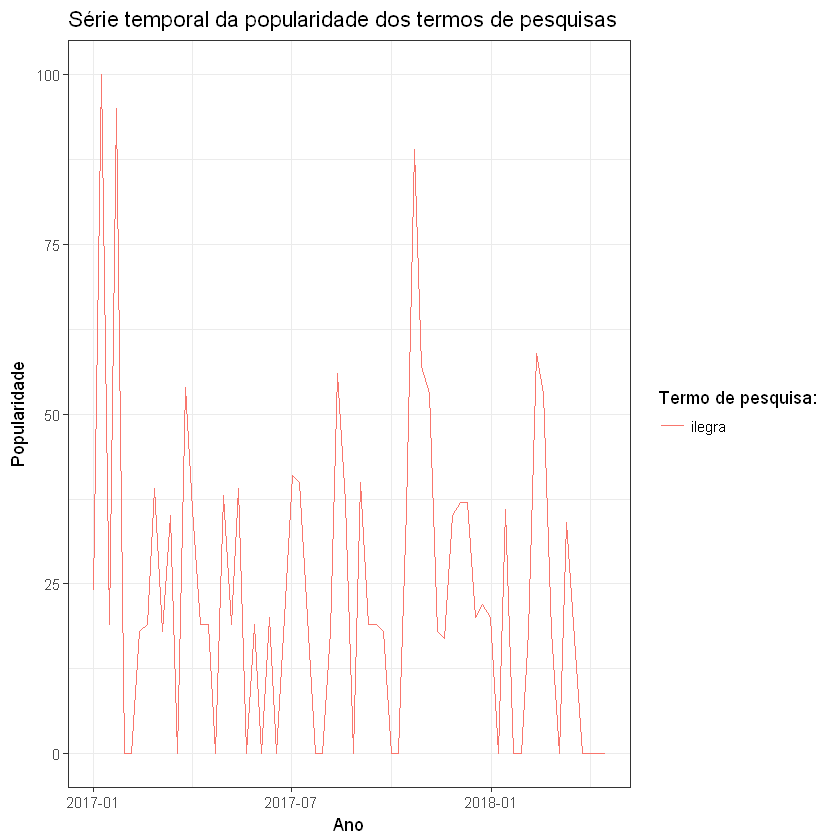

Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 13 weeks
trend = 15 weeks


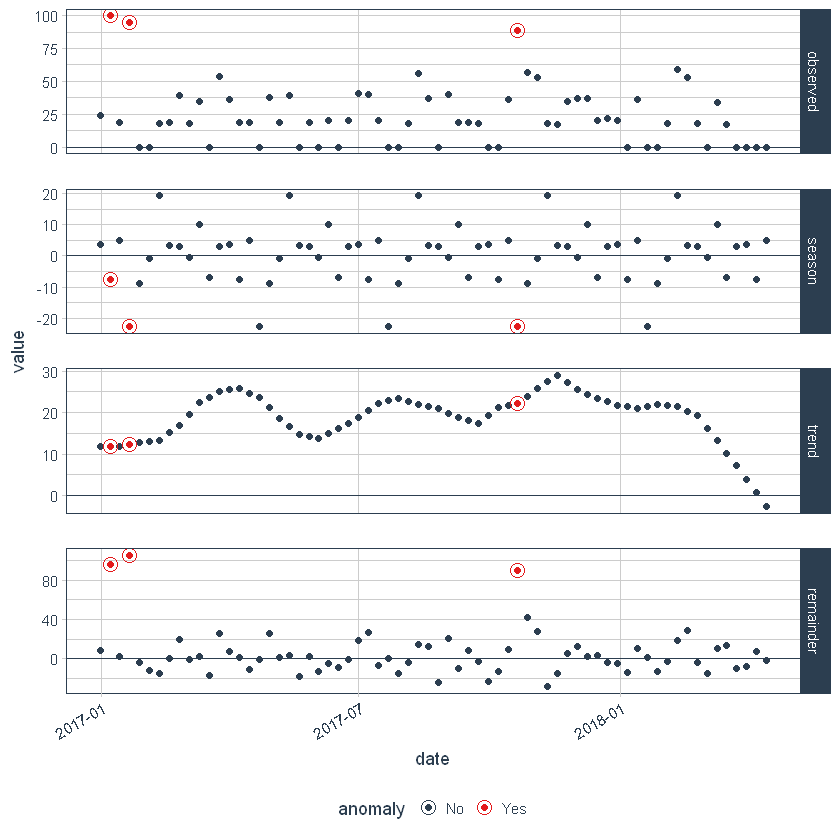

Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 13 weeks
trend = 15 weeks


date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
2017-01-07,100,-7.693864,11.83375,95.86012,-69.98476,71.66073,Yes,-65.84488,75.80061
2017-01-21,95,-22.785705,12.31672,105.46898,-69.98476,71.66073,Yes,-80.45375,61.19175
2017-10-21,89,-22.785705,22.17295,89.61276,-69.98476,71.66073,Yes,-70.59752,71.04797


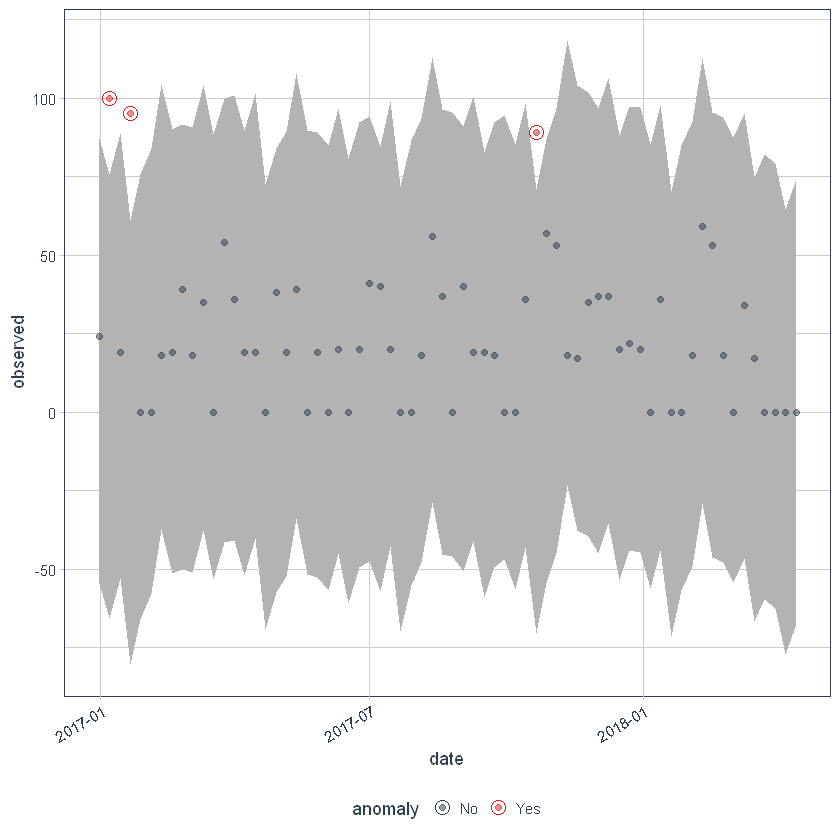

In [3]:
# 2017 |- present period ---------------------------------------------------
search_time <- "2017-01-01 2018-04-18" 
data_scientist <- 
gtrends(search_terms, geo = search_country, time = search_time,
	gprop = search_type, category = search_category, hl = search_language)

windows(width = 720, height = 320)

data_scientist$interest_over_time%>%
	as_tibble()%>%
	mutate(hits=as.numeric(hits))%>%
ggplot(aes(x=date,y=hits,colour=keyword))+
	geom_line()+theme_bw()+
	labs(y="Popularidade",
			x="Ano",colour="Termo de pesquisa:", 
			title="Série temporal da popularidade dos termos de pesquisas")


count_data <- data_scientist$interest_over_time[,"hits"]
time_data <- data_scientist$interest_over_time[,"date"]
data_anolmalyDec <- data.frame(time_data, count_data)
data_anolmalyDec_tbl <- as.tibble(data_anolmalyDec)

data_anolmalyDec_tbl <- data_anolmalyDec %>% as.tibble() %>% 
  mutate(date = as.Date(time_data)) %>% select(-one_of('time_data'))
head(data_anolmalyDec_tbl)

windows(width = 720, height = 320)

data_anolmalyDec_tbl %>% 
  time_decompose(count_data, method = "stl", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
  plot_anomaly_decomposition() 

windows(width = 720, height = 320)
 
data_anolmalyDec_tbl %>% 
  time_decompose(count_data) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)  

data_anolmalyDec_tbl %>% 
  time_decompose(count_data) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  filter(anomaly == 'Yes') 
# EOF